In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the dataset 
filename = 'D:/MSU_IIT/4th_Year/1st_Semester/ITD105/Dataset/seattle-weather.csv'
names = ['date', 'prepicitation', 'temp_max', 'temp_min', 'wind', 'weather']
dataframe = read_csv(filename)

# Drop 'date' column
dataframe = dataframe.drop('date', axis=1)

# Convert 'weather' column to numerical labels using LabelEncoder
#le = LabelEncoder()
#dataframe['weather'] = le.fit_transform(dataframe['weather'])

# Extract features and target variable
X = dataframe.drop('weather', axis=1)
Y = dataframe['weather']

# Set the test size
test_size = 0.20
seed = 7

# Split the dataset into test and train 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Create a Decision Tree Classifier
# model = DecisionTreeClassifier(random_state=seed)
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,  # Adjust the depth based on your data
    min_samples_split=5,  # Adjust based on the size of your dataset
    min_samples_leaf=2,  # Adjust based on the size of your dataset
    max_features=None,
    random_state=7
)
# Train the model
model.fit(X_train, Y_train)

# Save the trained model to a Joblib file
joblib.dump(model, 'weather_model.joblib')

# Evaluate the model
result1 = model.score(X_train, Y_train)
print(("Accuracy Train: %.3f%%") % (result1*100.0))
result = model.score(X_test, Y_test)
print(("Accuracy Test: %.3f%%") % (result*100.0))

# Make predictions
predictions = model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, predictions, zero_division=1))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy Train: 86.986%
Accuracy Test: 82.253%
Classification Report:
              precision    recall  f1-score   support

     drizzle       1.00      0.09      0.17        11
         fog       1.00      0.00      0.00        27
        rain       0.98      0.91      0.94       134
        snow       0.62      0.62      0.62         8
         sun       0.71      1.00      0.83       113

    accuracy                           0.82       293
   macro avg       0.86      0.53      0.51       293
weighted avg       0.87      0.82      0.77       293

Confusion Matrix:
[[  1   0   0   0  10]
 [  0   0   0   0  27]
 [  0   0 122   3   9]
 [  0   0   3   5   0]
 [  0   0   0   0 113]]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

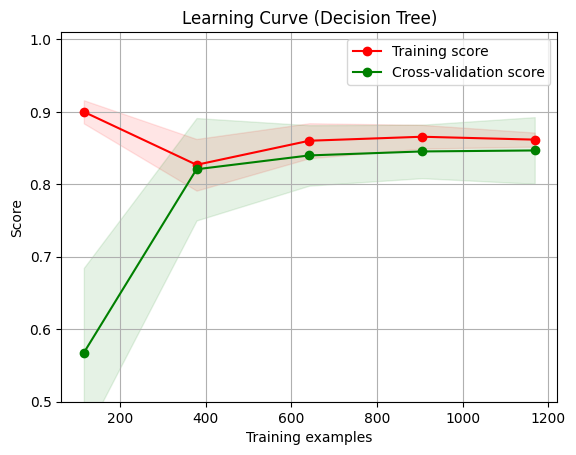

In [3]:
# Plot Learning Curve
title = "Learning Curve (Decision Tree)"
plot_learning_curve(model, title, X, Y, ylim=(0.5, 1.01), cv=None, n_jobs=-1)

plt.show()